# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [1]:
%matplotlib inline

import numpy as np
import numpy.typing as npt
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[54, 15, 52, ..., 20, 76,  6],
       [85, 37, 29, ..., 58, 99, 82],
       [50, 94, 65, ..., 71, 15, 65],
       ...,
       [16, 81, 48, ..., 68, 52, 67],
       [79, 97, 47, ..., 97, 64,  5],
       [91, 31, 71, ..., 44, 73, 59]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

Для случайной перестановки столбцов массива можно использовать две команды:
- np.random.permutation(array) - сохраняет исходный массив, возвращает изменённый новый массив
- np.random.shuffle(array) - изменяет сам входной массив.

Для многомерного массива происходит перестановка по первой оси, то есть для двумерного массива будут перемешаны строки, значин предварительно нужно транспонировать массив. 

Рассмотрим сначала на более наглядном примере:

In [2]:
test_array = np.random.randint(0, 100, size=(5, 5))
test_array

array([[89, 61, 18, 32, 24],
       [87, 71, 79, 92, 38],
       [12, 45, 40, 29, 89],
       [78, 76, 56, 23, 31],
       [ 9, 90, 49, 79, 65]])

In [3]:
np.random.permutation(test_array.transpose()).transpose()

array([[24, 18, 61, 32, 89],
       [38, 79, 71, 92, 87],
       [89, 40, 45, 29, 12],
       [31, 56, 76, 23, 78],
       [65, 49, 90, 79,  9]])

Тогда применим эту функцию к массиву А и получим случайную перестановку столбцов

In [4]:
np.random.permutation(A.transpose()).transpose()

array([[30, 78, 47, ..., 36, 82, 76],
       [23, 21, 46, ..., 62, 51, 99],
       [18, 63, 32, ..., 24, 38, 15],
       ...,
       [80, 32, 97, ...,  3, 89, 52],
       [53, 80, 93, ..., 32, 58, 64],
       [50, 87,  6, ..., 71, 85, 73]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

Проссумируем элементы по нечетным столбцам и возьмет среднее значение:

In [5]:
mean_odd = np.sum(A[:,1::2], axis=1).mean()
mean_odd

1225.225

Создадим маску проверки условия, что сумма элементов по четным столбцам больше среднего значения суммы по нечетным столбцам

In [6]:
mask = np.sum(A[:,0::2], axis=1) > mean_odd

In [7]:
A[mask, :]

array([[54, 15, 52, ..., 20, 76,  6],
       [10, 53, 39, ..., 70, 38, 24],
       [91, 94, 67, ..., 77,  2, 25],
       ...,
       [37,  7, 91, ..., 61, 57, 35],
       [16, 81, 48, ..., 68, 52, 67],
       [91, 31, 71, ..., 44, 73, 59]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [8]:
np.argmax(np.max(A, axis=1) - np.min(A, axis=1))

2

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [9]:
np.argsort(np.argsort(np.ravel(A))).reshape(A.shape)

array([[5482, 1572, 5259, ..., 2038, 7698,  696],
       [8615, 3733, 2998, ..., 5907, 9978, 8389],
       [5035, 9504, 6643, ..., 7209, 1589, 6630],
       ...,
       [1626, 8204, 4879, ..., 6991, 5285, 6885],
       [8016, 9747, 4792, ..., 9721, 6571,  525],
       [9244, 3115, 7244, ..., 4448, 7479, 6020]])

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [10]:
rows_count = A.shape[0]
min_args = A.min(axis=1).reshape(rows_count, 1)
max_args = A.max(axis=1).reshape(rows_count, 1)

In [11]:
(A - min_args) / (max_args - min_args)

array([[0.54347826, 0.11956522, 0.52173913, ..., 0.17391304, 0.7826087 ,
        0.02173913],
       [0.85714286, 0.36734694, 0.28571429, ..., 0.58163265, 1.        ,
        0.82653061],
       [0.50505051, 0.94949495, 0.65656566, ..., 0.71717172, 0.15151515,
        0.65656566],
       ...,
       [0.16161616, 0.81818182, 0.48484848, ..., 0.68686869, 0.52525253,
        0.67676768],
       [0.8125    , 1.        , 0.47916667, ..., 1.        , 0.65625   ,
        0.04166667],
       [0.92857143, 0.31632653, 0.7244898 , ..., 0.44897959, 0.74489796,
        0.60204082]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [12]:
np.cumsum(np.tile(A, (10, 1, 1)), axis=0)

array([[[ 54,  15,  52, ...,  20,  76,   6],
        [ 85,  37,  29, ...,  58,  99,  82],
        [ 50,  94,  65, ...,  71,  15,  65],
        ...,
        [ 16,  81,  48, ...,  68,  52,  67],
        [ 79,  97,  47, ...,  97,  64,   5],
        [ 91,  31,  71, ...,  44,  73,  59]],

       [[108,  30, 104, ...,  40, 152,  12],
        [170,  74,  58, ..., 116, 198, 164],
        [100, 188, 130, ..., 142,  30, 130],
        ...,
        [ 32, 162,  96, ..., 136, 104, 134],
        [158, 194,  94, ..., 194, 128,  10],
        [182,  62, 142, ...,  88, 146, 118]],

       [[162,  45, 156, ...,  60, 228,  18],
        [255, 111,  87, ..., 174, 297, 246],
        [150, 282, 195, ..., 213,  45, 195],
        ...,
        [ 48, 243, 144, ..., 204, 156, 201],
        [237, 291, 141, ..., 291, 192,  15],
        [273,  93, 213, ..., 132, 219, 177]],

       ...,

       [[432, 120, 416, ..., 160, 608,  48],
        [680, 296, 232, ..., 464, 792, 656],
        [400, 752, 520, ..., 568, 120, 520

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [13]:
np.concatenate((A[:,0::2], A[:,1::2]), axis=1)

array([[54, 52, 88, ..., 76, 20,  6],
       [85, 29, 17, ..., 52, 58, 82],
       [50, 65, 48, ..., 52, 71, 65],
       ...,
       [16, 48, 64, ..., 21, 68, 67],
       [79, 47, 83, ..., 73, 97,  5],
       [91, 71, 27, ..., 42, 44, 59]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [14]:
np.sum(np.all(A > 5, axis=1))

10

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который состоит из средних этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [15]:
np.mean(np.split(A, 10, axis=0), axis=0)

array([[46. , 49. , 48.1, 47.7, 57.9, 41.6, 44.9, 75. , 44.1, 35.5, 26.3,
        41.6, 48.4, 57.9, 45.6, 65.1, 55.4, 41. , 66. , 53. , 39.4, 49.2,
        25.1, 53.4, 52.6, 45.3, 52.3, 59.2, 60.8, 28.6, 64.7, 67. , 52.9,
        50.3, 65.2, 45.1, 64.5, 52.6, 54.3, 37.6, 57.1, 50.5, 39.5, 46.7,
        52.7, 44.4, 49.8, 41.6, 41.4, 39.5],
       [48.2, 48.7, 43.6, 49.5, 39.5, 49.6, 47. , 52.7, 49.3, 78. , 67.4,
        60.5, 44.1, 53.4, 54.7, 61.3, 54.3, 45.7, 45.8, 60.6, 39.3, 47.7,
        53.9, 57.7, 40.4, 45. , 60.5, 45. , 53.6, 33. , 52.4, 39. , 34.6,
        58.2, 50.7, 54.2, 35.9, 62.1, 35.8, 39.4, 36.7, 44.4, 54.9, 59.7,
        57.4, 52.8, 43.2, 43.8, 55.9, 49.6],
       [52.2, 65.2, 49.5, 44. , 38.8, 50.9, 45.5, 45.6, 52.7, 47.7, 45.6,
        32.2, 42.1, 43. , 39. , 58.2, 34.7, 47.3, 28. , 52.9, 64.2, 48.9,
        65.7, 65.8, 44.7, 49. , 43.3, 54. , 64.8, 38.6, 39.3, 42.6, 52.3,
        55.1, 46.8, 20.2, 43.2, 40. , 53.4, 58.1, 36.1, 24.6, 37.6, 50.8,
        35.4, 52.8, 37

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

Развернем массив:

In [16]:
ravel_A = np.ravel(A)
ravel_A

array([54, 15, 52, ..., 44, 73, 59])

In [17]:
uniq, indices = np.unique(ravel_A, return_index=True)


Уникальные элементы в том порядке, в котором они встречаются в массиве:

In [18]:
uniq[np.argsort(indices)]

array([54, 15, 52, 50, 88, 90, 96, 86, 22, 35, 59,  4,  6, 63, 55, 78, 13,
       19, 95, 12, 41, 49, 69, 42, 57, 53, 47, 36, 40, 79, 30, 93, 75, 37,
       82, 68, 58, 76, 51, 20, 85, 29, 17, 33, 56, 73, 64, 27, 97, 99, 21,
        1, 81, 94,  3, 46, 62, 24, 72, 91, 23, 60, 74, 48, 65, 45, 14, 32,
       66, 87, 26, 71,  8, 80, 84, 18, 89, 44,  0, 38, 34, 10, 39, 70, 67,
        2, 92, 77, 11, 25, 83, 16, 98, 61, 43, 31, 28,  7,  9,  5])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [19]:
mean_row = np.mean(A, axis=0)
np.linalg.norm(A - mean_row, axis=1)

array([188.63609444, 202.92485339, 194.96947485, 203.81650111,
       209.22534771, 205.5974857 , 188.27372659, 198.2934344 ,
       229.58995214, 211.87851737, 208.66742948, 203.16236395,
       207.97347457, 191.75569385, 210.51414709, 213.01259617,
       198.96435893, 198.48850376, 195.8675474 , 200.25555205,
       217.35686353, 224.5451984 , 221.97591339, 211.98586303,
       214.73634095, 203.13452716, 209.87483443, 204.46962152,
       188.13087499, 207.10981658, 197.26037647, 206.69026616,
       185.76236466, 200.25705013, 191.76356829, 202.00726751,
       201.06691952, 176.35701326, 189.32391852, 216.4560374 ,
       205.25841304, 201.72455509, 180.13860254, 212.04760344,
       199.69515799, 204.02797878, 192.38307131, 227.82064464,
       198.36619199, 206.03765706, 173.41293529, 192.148266  ,
       195.40152539, 186.69682945, 208.35910377, 189.39056504,
       207.05592511, 202.64892333, 189.6164975 , 198.99973901,
       224.31641965, 196.46067323, 206.74713087, 199.06

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [20]:
np.where(A < 50, A * 2, A * 3)

array([[162,  30, 156, ...,  40, 228,  12],
       [255,  74,  58, ..., 174, 297, 246],
       [150, 282, 195, ..., 213,  30, 195],
       ...,
       [ 32, 243,  96, ..., 204, 156, 201],
       [237, 291,  94, ..., 291, 192,  10],
       [273,  62, 213, ...,  88, 219, 177]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте новый массив той же размерности, состоящий из суммы скользящих средних по окну $3$, $5$, $10$.

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [21]:
def moving_average(x: npt.NDArray[np.int32], n: int = 3) -> npt.NDArray[np.float64]:
    return np.round(np.convolve(x, np.ones(n), 'same') / n, 2)

In [22]:
ravel_A = np.ravel(A)
ravel_A

array([54, 15, 52, ..., 44, 73, 59])

Скользящее среднее по окну 3:

In [23]:
moving_average(ravel_A, 3)

array([23.  , 40.33, 39.  , ..., 49.33, 58.67, 44.  ])

Скользящее среднее по окну 5:

In [24]:
moving_average(ravel_A, 5)

array([24.2, 34.2, 51.8, ..., 49.8, 41.4, 35.2])

Скользящее среднее по окну 10:

In [25]:
moving_average(ravel_A, 10)

array([25.9, 34.9, 44.5, ..., 40.9, 31.8, 27.5])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

In [26]:
def f(x: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    return (5 * np.sin(2 * x) - (np.cos(x))**2 - 1 + np.abs(x**3) - x**2) / (x**2 + 1)

def deriv(x: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    return scipy.misc.derivative(f, x)

x = np.linspace(-10, 10, 100)
y = f(x)

x_min_value = float(scipy.optimize.minimize(f, 0).x)
y_min_value = f(x_min_value)
print(f"Минимальное значение функции в точке:({x_min_value:0.4f}, {y_min_value:0.4f})")

Минимальное значение функции в точке:(-0.4975, -4.8821)


In [27]:
mov_average_1 = moving_average(y, 1)
mov_average_2 = moving_average(y, 2)
mov_average_5 = moving_average(y, 5)

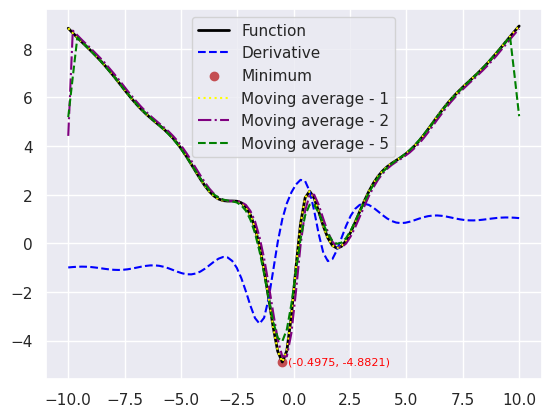

In [28]:
plt.plot(x, y, color='black', label='Function',linewidth=2)
plt.plot(x, deriv(x), '--', c='blue', label='Derivative')
plt.scatter(x_min_value, y_min_value, c='r', label='Minimum')
plt.text(2., -5., f"({x_min_value:0.4f}, {y_min_value:0.4f})", horizontalalignment='center',
         fontsize=8, color='red')

plt.plot(x, mov_average_1, ':', c='yellow', label='Moving average - 1')
plt.plot(x, mov_average_2, '-.', c='purple', label='Moving average - 2')
plt.plot(x, mov_average_5, '--', c='green', label='Moving average - 5')

plt.legend(loc='upper center')
plt.show()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [29]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[0, 0, 0, 3, 4]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [30]:
def sample_np(x: npt.NDArray[np.int32], c: int) -> npt.NDArray[np.int32]:
    assert len(x) > 0
    
    s = np.sum(x)
    indices = np.array(c)
    sums = np.cumsum(x)

    values = s * np.random.random(size=(c, 1))
    result = np.sum(sums < values, axis=1)
    
    return result

            
sample_np(np.array([50, 3, 1, 7, 20]), 5)   

array([0, 0, 0, 3, 0])

Используем критерий Стьюдента для проверки нулевой гипотезы о том, что две независимые выборки имеют одинаковые мат. ожидания. Уровень статистической значимости $\alpha$ = 0.05

In [37]:
import scipy.stats as stats

sample1 = sample([50, 3, 1, 7, 20], 30)
sample2 = sample_np(np.array([50, 3, 1, 7, 20]), 30)   
stats.ttest_ind(a=sample1, b=sample2) 

Ttest_indResult(statistic=0.27378753126807565, pvalue=0.7852205862749227)

p-value > 0.05, значит нулевая гипотеза не может быть отвергнута. Нет оснований сказать, что мат. ожидание различны.

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [38]:
import random 
import timeit

def walk(n: int) -> int:
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

print(f"Полученное значение: {walk(10000)}")

run_count = 100
t = timeit.Timer("walk(10000)", 'from __main__ import walk')
print(f"Для {run_count} запусков время: {t.timeit(run_count)} секунд")

Полученное значение: 2106
Для 100 запусков время: 0.5174841520001792 секунд


Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном запусков. 

In [39]:
def walk_np(n: int) -> int:
    steps = np.random.choice([-3, -1, 0, 2, 3], size=(n,))
    walk = np.cumsum(steps)
    
    return walk[-1]

print(f"Полученное значение: {walk(10000)}")

run_count = 100
t = timeit.Timer("walk_np(10000)", 'from __main__ import walk_np')
print(f"Для {run_count} запусков время: {t.timeit(run_count)} секунд")

Полученное значение: 1921
Для 100 запусков время: 0.027357658999790146 секунд


Реализация с помощью `Numpy` для 100 значений `walk(10_000)` дает преимущество в производительности на 1-2 порядка

In [40]:
run_count = 10000
dist = np.empty(run_count)
for i in range (run_count):
    dist[i] = walk_np(10000)

dist

array([2328., 2184., 2139., ..., 1999., 2275., 2019.])

<AxesSubplot:ylabel='Density'>

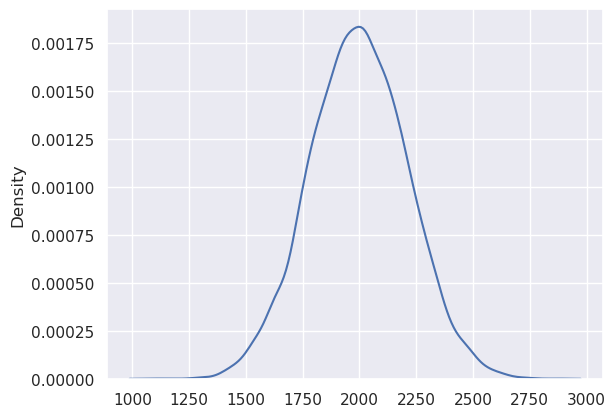

In [41]:
sns.kdeplot(dist)

Для большого количества повторений алгоритма "случайного блуждания" получается нормальное распределение, c мат. ожиданием в диапазоне 2000

In [42]:
print(f"Среднее значение: {dist.mean()}")
stats.normaltest(dist, nan_policy='propagate')

Среднее значение: 1997.4514


NormaltestResult(statistic=0.8057085552993729, pvalue=0.6684094944295664)

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [56]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

a = np.random.random((10000, 10000))

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

## Numba

In [45]:
from numba import njit, float64

@njit
def strange_conv_numba(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

a = np.random.random((10000, 10000))
t = timeit.Timer("strange_conv_numba(a)", 'from __main__ import strange_conv_numba, a')
t.timeit(1)

0.42788803899929917

## Cython

In [52]:
%load_ext Cython

In [55]:
%%cython

cimport numpy

def strange_conv_cython(numpy.ndarray['double', ndim=2] a):
    cdef int x = a.shape[0]
    cdef int y = a.shape[1]
    cdef double t = 1.0

    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

In file included from /home/dmitry/.local/lib/python3.10/site-packages/numpy/core/include/numpy/ndarraytypes.h:1948,
                 from /home/dmitry/.local/lib/python3.10/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /home/dmitry/.local/lib/python3.10/site-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /home/dmitry/.cache/ipython/cython/_cython_magic_77663d8a8f3bbe69dc5c581d375e423d.c:770:
/home/dmitry/.local/lib/python3.10/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~


Результаты:
1. Python
2. Numba
3. Cython

In [59]:
%%timeit
strange_conv(a)

15.6 s ± 831 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [63]:
%%timeit
strange_conv_numba(a)

34.8 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [64]:
%%timeit
strange_conv_cython(a)

554 ms ± 26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
